<a href="https://colab.research.google.com/github/edrc1999/Daniel-Ramos-/blob/main/Semana2/Limpieza_datos/Ejercicio1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MODELOS PREDICTIVOS PARA SISTEMAS INTELIGENTES

## Ejercicio: Limpieza usando pandas

In [42]:
# Cargar el dataset DailyDelhiClimateTrain.csv
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
data = pd.read_csv('/DailyDelhiClimateTrain.csv')

          meantemp     humidity   wind_speed  meanpressure
count  1462.000000  1462.000000  1462.000000   1462.000000
mean     25.495521    60.771702     6.802209   1011.104548
std       7.348103    16.769652     4.561602    180.231668
min       6.000000    13.428571     0.000000     -3.041667
25%      18.857143    50.375000     3.475000   1001.580357
50%      27.714286    62.625000     6.221667   1008.563492
75%      31.305804    72.218750     9.238235   1014.944901
max      38.714286   100.000000    42.220000   7679.333333
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1462 non-null   object 
 1   meantemp      1462 non-null   float64
 2   humidity      1462 non-null   float64
 3   wind_speed    1462 non-null   float64
 4   meanpressure  1462 non-null   float64
dtypes: float64(4), object(1)
memory usage: 57.2+ KB
None
date

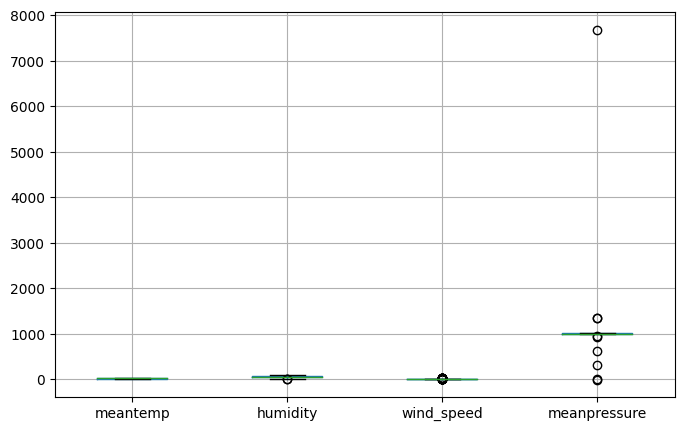

      meantemp  humidity  wind_speed  meanpressure
0        False     False       False         False
1        False     False       False         False
2        False     False       False         False
3        False     False       False         False
4        False     False       False         False
...        ...       ...         ...           ...
1457     False     False       False         False
1458     False     False       False         False
1459     False     False       False         False
1460     False     False       False         False
1461     False     False       False         False

[1462 rows x 4 columns]


In [23]:
# Verificar las estadísticas generales del dataset
# Revisar la información, encuentre en los datos máximos y mínimos de las variables
# Revisar si encuentra algo fuera de lo normal

print(data.describe())
print (data.info())
print (data.max())
print (data.min())
data.boxplot(figsize=(8,5))
plt.show()
ndata = data.select_dtypes(include=['float64', 'int64'])
Q1 = ndata.quantile(0.25)
Q3 = ndata.quantile(0.75)
IQR = Q3 - Q1
atipicos = ((ndata < (Q1 - 1.5 * IQR)) | (ndata > (Q3 + 1.5 * IQR)))
print(atipicos)


In [24]:
# Eliminar las columnas meantemp, humidity y wind_speed. Mantenga la columna meanpressure
data = data.drop(["meantemp", "humidity", "wind_speed"], axis=1)
data.head()

,date,meanpressure
0,2013-01-01,1015.666667
1,2013-01-02,1017.800000
2,2013-01-03,1018.666667
3,2013-01-04,1017.166667
4,2013-01-05,1016.500000


La grafica nos muestra valores estables hasta antes del rango de los 1200
posteriormente hay un valor atipico muy por encima de los demas valores
y al final tambien se encuentran otros valores atipicos pero no tan alejados de la media


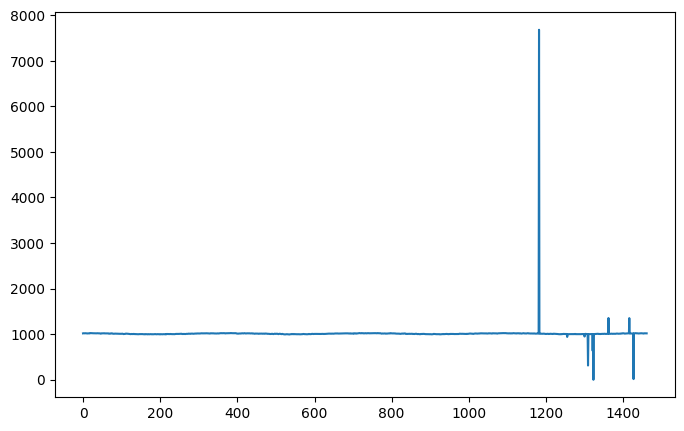

In [31]:
# Graficar los datos del campo meanpressure
# Qué puede decir de la gráfica?
# Hay algo atípico en esa respuesta temporal?
data['meanpressure'].plot(kind='line', figsize=(8,5))
print("La grafica nos muestra valores estables hasta antes del rango de los 1200" "\n" "posteriormente hay un valor atipico muy por encima de los demas valores" "\n" "y al final tambien se encuentran otros valores atipicos pero no tan alejados de la media")

<function matplotlib.pyplot.show(close=None, block=None)>

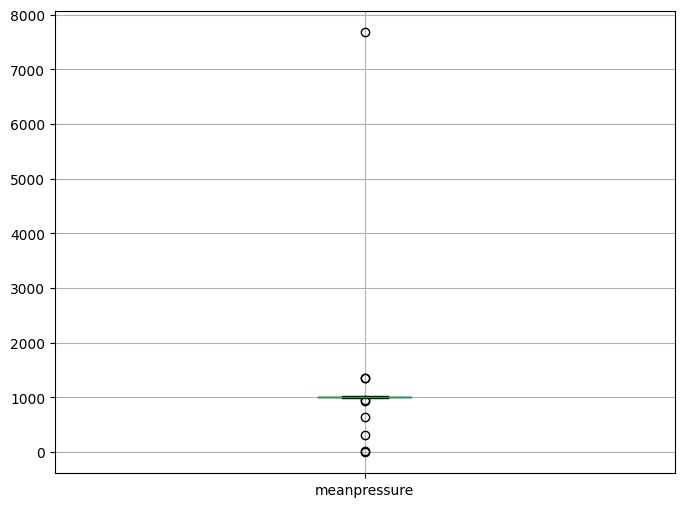

In [32]:
# Realice un diagrama de cajas y alambres para determinar visualmente si hay outliers
data.boxplot(column='meanpressure', figsize=(8, 6))
plt.show


In [36]:
# Calcular el parámetro Zscore para la columna meanpressure
mean_col = data["meanpressure"].mean()
std_col = data["meanpressure"].std()
data["zscore"]= (data["meanpressure"]-mean_col)/std_col
data.head()

,date,meanpressure,zscore
0,2013-01-01,1015.666667,0.025313
1,2013-01-02,1017.800000,0.037149
2,2013-01-03,1018.666667,0.041958
3,2013-01-04,1017.166667,0.033635
4,2013-01-05,1016.500000,0.029936


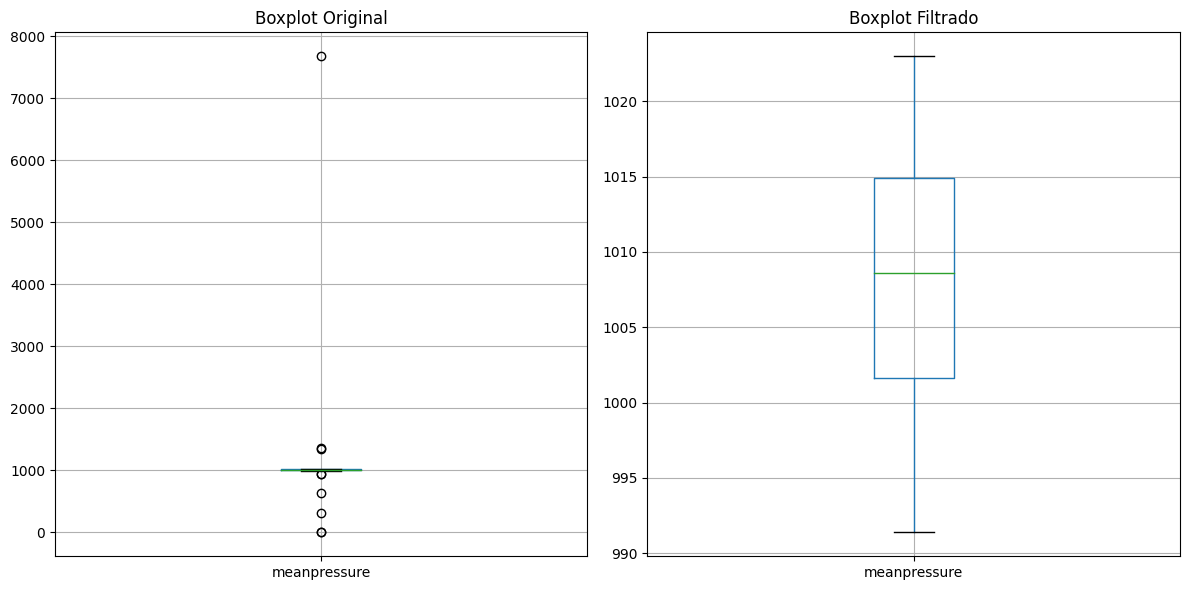

In [61]:
# Variar el valor del humbral de Zscore para filtrar valores atípicos hasta que considere que la gráfica de la variable
#  meanpressure sea correcta
meanpressure = data['meanpressure']
z_scores = np.abs(stats.zscore(meanpressure))
umbral = 0.2
datos_filtrados = data[z_scores < umbral]
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
data.boxplot(column='meanpressure', figsize=(8, 6))
plt.title('Original')

plt.subplot(1, 2, 2)
datos_filtrados.boxplot(column='meanpressure', figsize=(8, 6))
plt.title('Valores filtrados')

plt.tight_layout()
plt.show()


(array([ 1.,  4.,  5., 22., 31., 49., 63., 64., 67., 82., 59., 77., 41.,
        52., 58., 31., 56., 46., 54., 49., 81., 62., 79., 96., 78., 55.,
        41., 32., 14.,  4.]),
 array([ 991.375     ,  992.42916667,  993.48333333,  994.5375    ,
         995.59166667,  996.64583333,  997.7       ,  998.75416667,
         999.80833333, 1000.8625    , 1001.91666667, 1002.97083333,
        1004.025     , 1005.07916667, 1006.13333333, 1007.1875    ,
        1008.24166667, 1009.29583333, 1010.35      , 1011.40416667,
        1012.45833333, 1013.5125    , 1014.56666667, 1015.62083333,
        1016.675     , 1017.72916667, 1018.78333333, 1019.8375    ,
        1020.89166667, 1021.94583333, 1023.        ]),
 <BarContainer object of 30 artists>)

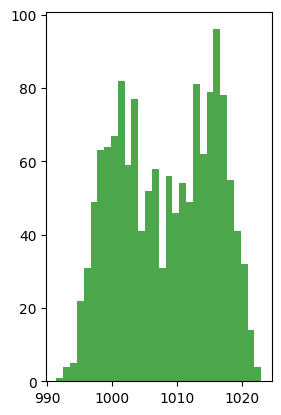

In [62]:
# Para los datos sin outliers verificar nuevamente las estadísticas generales
# Qué puede decir de los valores máximos y mínimos de los datos filtrados
plt.subplot(1, 2, 2)
plt.hist(datos_filtrados['meanpressure'], bins=30, color='green', alpha=0.7)
print ("los datos ahora estan en un rango mas adecuado sin datos muy atipicos")

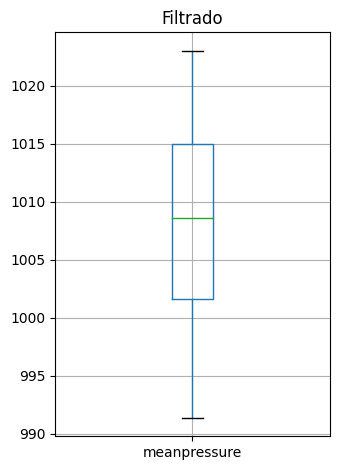

In [64]:
# Realice un diagrama de cajas y alambres para determinar visualmente si aún hay outliers
plt.subplot(1, 2, 2)
datos_filtrados.boxplot(column='meanpressure', figsize=(8, 6))
plt.title('Filtrado')

plt.tight_layout()
plt.show()